## EJERCICIO 1

### 1.1

In [1]:
def suma_cuadrados(n):
    var('res', 'i')
    res = sum(i^2, i, 1, n)
    return res

In [2]:
def hipotesis(i):
    return (i * (i + 1)*(2*i + 1)) / 6
def induccion(k):
    L = []
    
    for x in srange(1, k):
        if hipotesis(x) == suma_cuadrados(x):
            L.append(1)
        else:
            L.append(0)
    return L
    

In [3]:
all(induccion(1000))

True

### 1.2

In [14]:
def suma_hipotesis(n):
    var('res', 'i')
    res = sum(1/(i*(i+1)), i, 1, n)
    return res

In [15]:
def hipotesis(i):
    return i/(i+1)
def induccion(k):
    L = []
    
    for x in srange(1, k):
        if hipotesis(x) == suma_hipotesis(x):
            L.append(1)
        else:
            L.append(0)
    return L

In [16]:
all(induccion(1000))

True

### 1.3

In [19]:
def suma_hipotesis(n):
    var('suma', 'i')
    suma = sum(i*factorial(i), i, 1, n)
    return suma

def hipotesis(i):
    var('res')
    res = factorial(i+1) - 1
    return res

def induccion(k):
    L = []
    
    for x in srange(1, k):
        if hipotesis(x) == suma_hipotesis(x):
            L.append(1)
        else:
            L.append(0)
    return L

In [20]:
all(induccion(100))

True

### 1.4 

In [31]:
def suma_hipotesis(n):
    var('suma', 'i')
    suma = sum(i/(2**i), i, 1, n)
    return suma

def hipotesis(i):
    var('res')
    res = 2 - (i + 2)/(2**i)
    return res

def induccion(k):
    L = []
    
    for x in srange(1, k):
        if suma_hipotesis(x) == hipotesis(x):
            L.append(1)
        else:
            L.append(0)
    return L

In [32]:
all(induccion(100))

True

### 1.5

In [42]:
def prod_hipotesis(q, n):
    var('pdto', 'i')
    pdto = 1
    for i in srange(1, n):
        pdto *= 1 + q**i
    return pdto

def hipotesis(q, n):
    var('res')
    res = (1 - q**(2**(n+1)))/(1 - q)
    return res

def induccion(q, k):
    L = []
    
    for x in srange(1, k):
        for y in srange(2, q):
            if prod_hipotesis(y, x) == hipotesis(y,x):
                L.append(1)
            else:
                L.append(0)
                
    return L

In [44]:
all(induccion(2, 100))

True

### EJERCICIO DE CÁLCULO

In [105]:
def function(x, a, b):
    var('res')
    res = x**4 - 6*x**2 + a*x + b
    return res


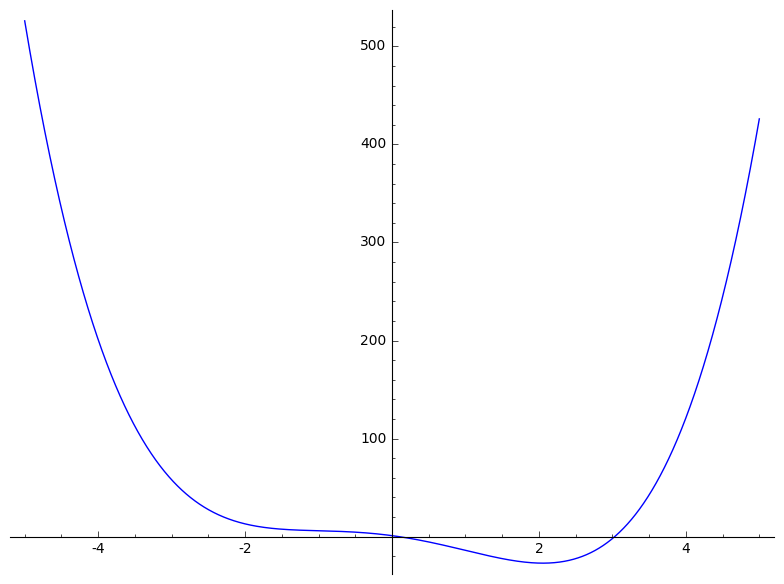

In [130]:
plot(function(x, -10, 1), (x, -5, 5))

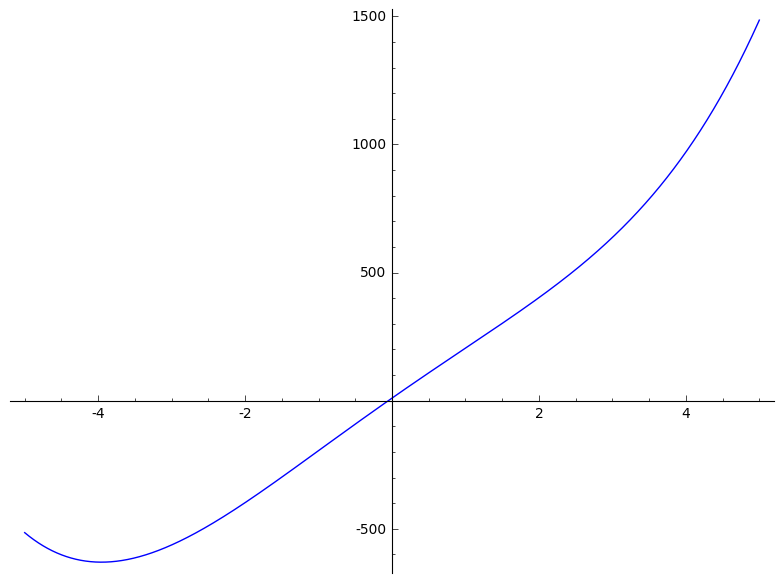

In [122]:
plot((x**4 - 6 * x**2 + 200 * x + 10), (x, -5, 5))

In [87]:
solve(function(x, 8, 0), x)

[x == -1/2*(I*sqrt(3) + 1)*(2*sqrt(2) - 4)^(1/3) + (I*sqrt(3) - 1)/(2*sqrt(2) - 4)^(1/3), x == -1/2*(-I*sqrt(3) + 1)*(2*sqrt(2) - 4)^(1/3) + (-I*sqrt(3) - 1)/(2*sqrt(2) - 4)^(1/3), x == (2*sqrt(2) - 4)^(1/3) + 2/(2*sqrt(2) - 4)^(1/3), x == 0]

Salvo el caso x == 0, todas sus raíces son imaginarias

Ahora vamos a calcular máximos y mínimos de la función, para lo que vamos a derivar e igualar a 0

In [83]:
a = function(x, 8, 0).derivative()

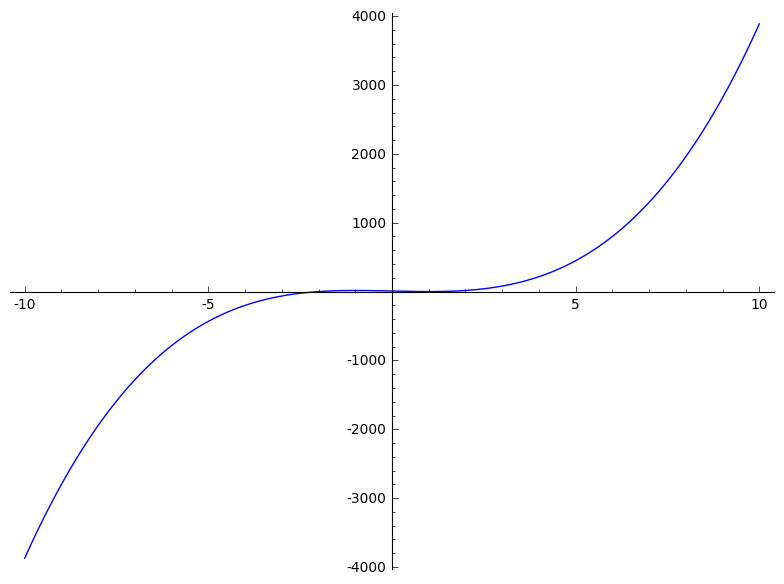

In [86]:
plot(a, (x, -10, 10))

In [85]:
a.solve(x)

[x == -2, x == 1]

Ahora analizamos la segunda derivada

In [88]:
b = a.derivative()

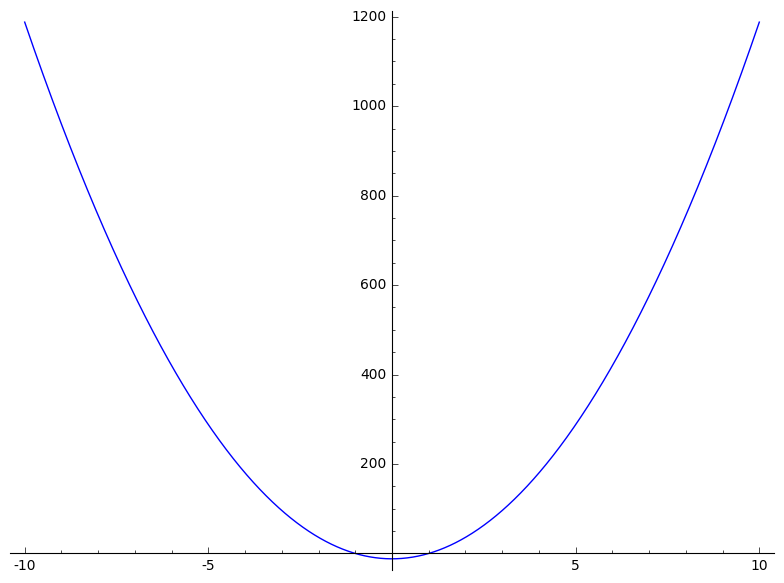

In [89]:
plot(b, (x, -10, 10))

In [90]:
b.solve(x)

[x == -1, x == 1]

Vemos que en x == 1 se anulan la primera y segunda derivada, por lo que en esta región la función va a ser "lineal". También vemos que la primera derivada es creciente (y positiva) para x >= 0, es decir, que para valores a = 8 y b = 0, para x >= 0 la función se curva hacia arriba cada vez más (exponencialmente), como se puede apreciar en la primera gráfica

Para a = +-8 una de las jorobas se aplana (la derecha en positivos y la izquierda en negativos)
Para a = 0, las jorobas son iguales.
Por tanto, si a está entre +-8, puede haber hasta 4 soluciones reales en función del valor de b (que sube y baja la gráfica)
Sin embargo, si abs(a) > 8 sólo puede haber cero o dos soluciones, en funcion de b (o una si la joroba que queda es justo tangente al eje de las x)

### Ejercicio 6 (2.7.3) 

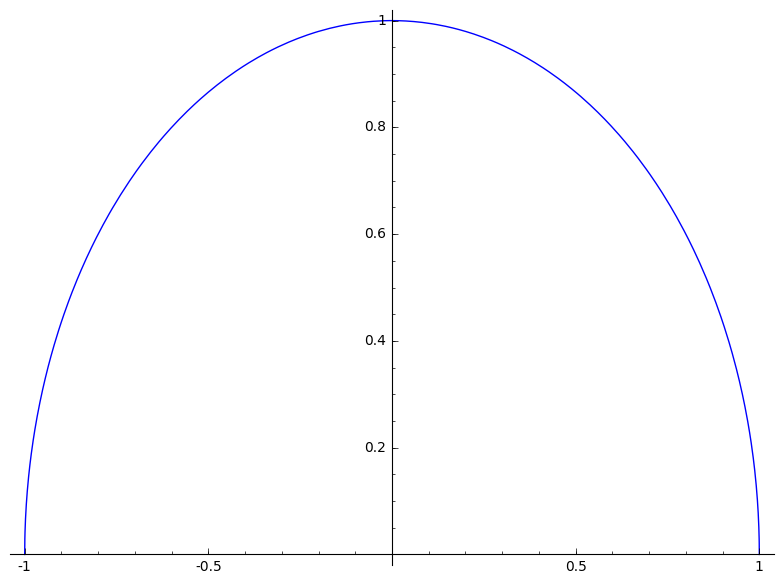

In [6]:
plot(sqrt(1-x**2))

In [14]:
var('alpha')
assume(sin(alpha) + cos(alpha) > 0)
g(alpha) = integrate((sqrt(1-x**2)), x, -cos(alpha), sin(alpha))

In [15]:
show(g)

alpha |--> 1/2*sqrt(-cos(alpha)^2 + 1)*cos(alpha) + 1/2*sqrt(-sin(alpha)^2 + 1)*sin(alpha) + 1/2*arcsin(cos(alpha)) + 1/2*arcsin(sin(alpha))

In [37]:
t = find_local_maximum(g, -pi, pi)

In [38]:
show(t)

(1.2853981633974483, 0.78539817718260874)

Hemos integrado la semicircunferencia entre -cos(alpha) y sin(alpha) y así obtenemos el área entre ambas rectas en función de alpha. 
El máximo cociente entre ese área y su complementario se va a obtener cuando ese área sea máxima, así que derivamos ese área para saber en qué valor de alpha va a ser mayor, obteniendo dos máximos locales. A continuación hallamos el área para ambos valores y veremos en cuál de los dos tenemos un área mayor:

In [39]:
show(g(t[0]))

1.05554931633152

In [40]:
show(g(t[1]))

1.2853981633974483

Vemos ahora que el valor de alpha para el que el área es mayor es el segundo obtenido al derivar el área. Por tanto el cociente entre áreas va a ser máximo para alpha = pi/4